# Imports

In [1]:
# Ajouter chemin système pour naviguer d'un dossier à l'autre facilement
import sys
from pathlib import Path
sys.path.append(str(Path('.').absolute().parent))

In [2]:
pip install plot-keras-history


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
########## Imports ##########
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import time

from packages import fonctions

%matplotlib inline
import os
from os import listdir
from glob import glob

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn import manifold, decomposition
from sklearn import cluster, metrics
#from tensorflow.keras.optimizers.legacy import Adam

#pip install plot-keras-history
from plot_keras_history import show_history, plot_history

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# tensorflow
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# os.environ["TF_KERAS"]='1'
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)

In [5]:
# Choix d'une palette de couleurs

sns.set_palette('Set2', color_codes = True)
print(sns.color_palette('Set2').as_hex())
# palettes testées : 'Spectral', 'flare', 'twilight', 'husl', 'Set1', 'Set2', 'Set3'
#sns.set_style('darkgrid')
sns.color_palette()

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

# Préparation des données

In [6]:
########## Import données csv ##########
# dossier data hors du dossier code pour ne pas l'importer dans github

df = pd.read_csv('../../data/flipkart_com-ecommerce_sample_1050.csv')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [7]:
# Dictionnaire des catégories (pour réduire le nombre de catégories - cf notebook Data_exploration_EDA)
dict_categories = {
    'Home and Kitchen Essential' : [
        'Home Furnishing', 'Tray Sets', 'Coffee Mugs', 'Lunch Boxes', 'Caffeine Bowls', 'Water bottle', 'Omic Sippers', 'Kitchen Tools', 'Bar Accessories', 'Bar Glasses', 'Idli Makers', 'Craft Jugs', 'Table Clocks', 'Bhalaria Forks', 'Kitchen Containers'],
    'Baby and Personal Care' : [
        'Baby Care', 'Personal Care'],
    'Electronics and Accessories' : [
        'Wrist Watches', 'Network Components', 'Tablet Accessories', 'Laptop Accessories', 'Pen Drives', 'Computer Components'],
    'Festive and Special Occasion' : ['Festive Needs', 'BFT Bulbs']
}

In [8]:
# Extraire catégories de la feature 'product_category_tree' et réduire nombre de catégories en utilisant le dictionnaire ci dessus
df['category'] = df.apply(fonctions.get_category, axis = 1)
inverse = { v: k for k, l in dict_categories.items() for v in l }
df['category_4'] = df['category'].map(inverse)
df['category_4'].value_counts()

Baby and Personal Care          300
Electronics and Accessories     292
Home and Kitchen Essential      263
Festive and Special Occasion    151
Name: category_4, dtype: int64

In [9]:
df = df[['category_4', 'description']]
df.columns = ['category', 'description']
df.shape

(1050, 2)

In [10]:
df['category'].unique().tolist()

['Home and Kitchen Essential',
 'Baby and Personal Care',
 'Electronics and Accessories',
 'Festive and Special Occasion',
 nan]

In [11]:
#path_train = '../../data/Images/train/'
#path_test = '../../data/Images/test/'

path = '../../data/Images/'

In [12]:
data_path = glob(path + '**.jp*')
#data_path_test = glob(path_test + '**.jp*')

data = fonctions.data_fct(df, data_path)
#data_test = fonctions.data_fct(df, data_path_test)

le = preprocessing.LabelEncoder()
le.fit(data['label_name'])
data['label'] = le.transform(data['label_name'])
#data_test['label'] = le.transform(data_test['label_name'])
data.head(5)

1050


,image_path,label_name,label
0,../../data/Images/aa68675f50a0551b8dadb954017a...,Home and Kitchen Essential,3
1,../../data/Images/037c2402fee39fbc80433935711d...,Baby and Personal Care,0
2,../../data/Images/42643c1c9403f67921a18654bcf4...,Baby and Personal Care,0
3,../../data/Images/53f4bc7d7321f5c41de6b86e41f1...,Home and Kitchen Essential,3
4,../../data/Images/b144a363c107c7bdd91f32d6e28b...,Home and Kitchen Essential,3


In [13]:
data.groupby('label').count()

,image_path,label_name
label,,
0,300,300
1,292,292
2,151,151
3,263,263
4,44,0


In [14]:
df_nan = data.loc[data['label_name'].isna()]
df_nan

,image_path,label_name,label
52,../../data/Images/8f41c6931b5220c2bb34d1cab21c...,NaN,4
86,../../data/Images/170fdf050c7a1f8d30ef5a98c421...,NaN,4
87,../../data/Images/f9a8320c182841024f47ebcba284...,NaN,4
115,../../data/Images/cf2ba696547459733c6bbfad4e3b...,NaN,4
234,../../data/Images/52877a6306aef18af67ab54c8233...,NaN,4
238,../../data/Images/f01140c02fd09e5c56312a64fa8d...,NaN,4
240,../../data/Images/de911421573d3e234450040374b5...,NaN,4
241,../../data/Images/ae03731c3482a5e42d040dbf723c...,NaN,4
242,../../data/Images/63523a600ab69f276664d0eade9d...,NaN,4
243,../../data/Images/32cf0691248297655e2c1728b12e...,NaN,4


In [15]:
# drop nan ici - visualiser les images rapidement
data.dropna(inplace = True)

In [16]:
data.loc[data['label_name'].isna()]

,image_path,label_name,label


In [17]:
data.reset_index(drop = True, inplace = True)

In [18]:
# essayer de les classifier à la fin quand mon modèle sera au point et vérifier visuellement

Home and Kitchen Essential


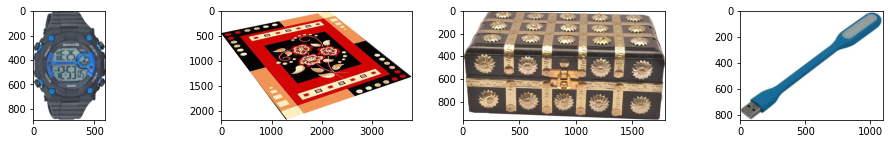

Baby and Personal Care


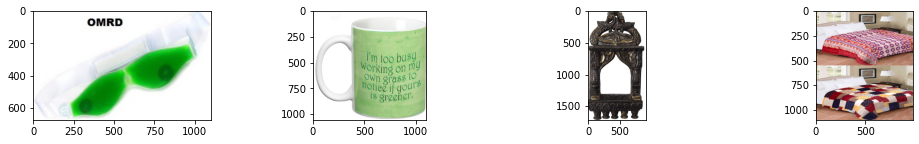

Electronics and Accessories


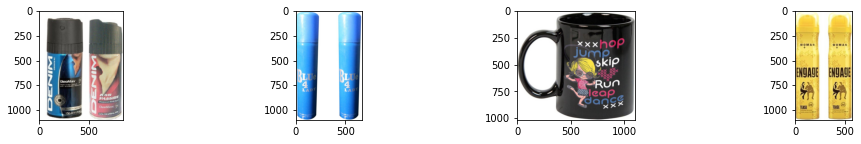

Festive and Special Occasion


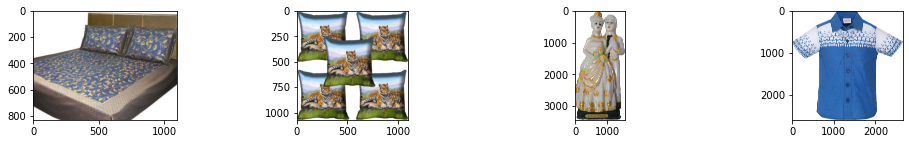

In [19]:
list_labels = data['label_name'].unique().tolist()

for name in list_labels:
    print(name)
    plt.figure(figsize = (17, 2))
    for i in range(len(list_labels)):
        plt.subplot(140 + 1 + i)
        filename = fonctions.list_fct(data, name)[i + 10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

# Etape 1 : étude de faisabilité

## Création du modèle pré-entraîné

In [20]:
base_model = VGG16()
model = Model(inputs = base_model.inputs, outputs = base_model.layers[-2].output)

print(model.summary())

2024-03-01 15:35:43.091944: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-01 15:35:43.092099: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                   

## Création des features des images

In [21]:
images_features = []
i = 0 
for image_file in data['image_path']:
    if i % 100 == 0:
        print(i)
    i +=1
    image = load_img(image_file, target_size = (224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis = 0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose = 0)[0]) # predict from pretrained model

images_features = np.asarray(images_features)
images_features.shape

0


2024-03-01 15:35:45.765517: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-03-01 15:35:45.867303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100
200
300
400
500
600
700
800
900
1000


(1006, 4096)

## Réduction dimension et analyse

### Réduction de dimension PCA

In [22]:
print(images_features.shape)
pca = decomposition.PCA(n_components = 0.99)
feat_pca = pca.fit_transform(images_features)
print(feat_pca.shape)

(1006, 4096)
(1006, 776)


### Réduction de dimension T-SNE et affichage des images selon vraies classes

In [23]:
temps1 = time.time()

tsne = manifold.TSNE(n_components = 2, perplexity = 30, n_iter = 2000, init = 'random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

duration1=time.time() - temps1
print('temps de T-SNE : ', '%15.2f' % duration1, 'secondes')

temps de T-SNE :             4.37 secondes


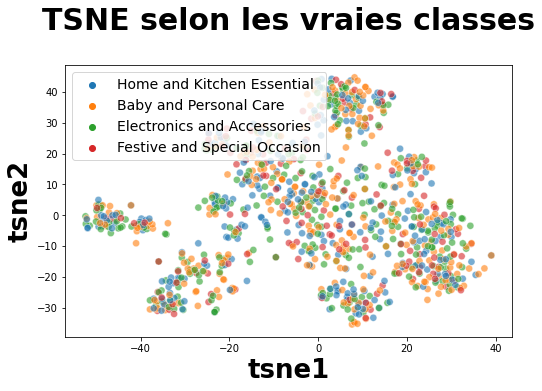

In [24]:
df_tsne = pd.DataFrame(X_tsne, columns = ['tsne1', 'tsne2'])
df_tsne['class'] = data['label_name']

plt.figure(figsize = (8, 5))
sns.scatterplot(
    x = 'tsne1',
    y = 'tsne2',
    hue = 'class',
    palette = sns.color_palette('tab10', n_colors = 4),
    s = 50,
    alpha = 0.6,
    data = df_tsne,
    legend = 'brief'
    )

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop = {'size': 14})
plt.show()

### Création de clusters à partir du T-SNE et affichage des images selon clusters

In [25]:
cls = cluster.KMeans(n_clusters = 4, n_init = 100)
cls.fit(X_tsne)

KMeans(n_clusters=4, n_init=100)

In [26]:
df_tsne['cluster'] = cls.labels_
df_tsne

,tsne1,tsne2,class,cluster
0,0.152830,4.255170,Home and Kitchen Essential,1
1,37.425400,-17.186213,Baby and Personal Care,0
2,25.482332,-8.624081,Baby and Personal Care,0
3,21.559294,13.635968,Home and Kitchen Essential,3
4,12.687223,38.404747,Home and Kitchen Essential,3
...,...,...,...,...
1001,27.091467,-25.364323,Baby and Personal Care,0
1002,6.016306,-17.210251,Baby and Personal Care,0
1003,13.477935,15.820957,Baby and Personal Care,3
1004,26.333012,0.456604,Baby and Personal Care,0


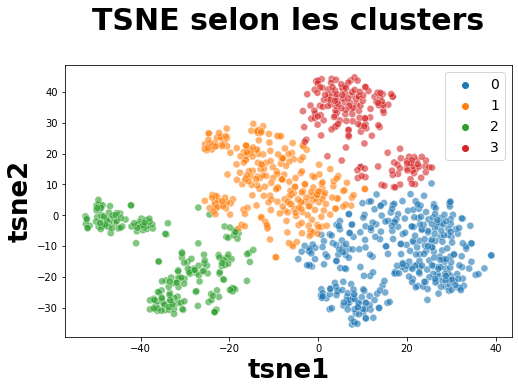

In [27]:
plt.figure(figsize = (8, 5))
sns.scatterplot(
    x = 'tsne1',
    y = 'tsne2',
    hue = 'cluster',
    palette = sns.color_palette('tab10', n_colors = 4),
    s = 50,
    alpha = 0.6,
    data = df_tsne,
    legend = 'brief'
    )

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop = {'size': 14}) 
plt.show()

In [28]:
labels = data['label']
print('ARI : ', metrics.adjusted_rand_score(labels, cls.labels_))

ARI :  -0.0016503598071294697


In [29]:
# Commenter l'ari score

In [30]:
# Analyse d'image "shine" affectées au cluster 3 "cloudy"
# hein ?????

list_shine_0 = [i for i in range(len(data['image_path'])) \
                if (data.iloc[i]['label_name'] == 'Baby and Personal Care') and (df_tsne.iloc[i]['cluster'] == 3)]
list_shine_0[0]

42

tsne1                         14.004534
tsne2                         39.649834
class      Festive and Special Occasion
cluster                               3
Name: 220, dtype: object


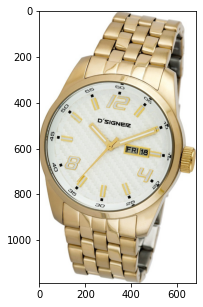

In [31]:
# Affichage image "shine" considérée comme "cloudy"
id = 220 ### A VERIFIER
print(df_tsne.iloc[id])
fig = plt.figure(figsize = (8, 5))
# plt.subplot(130 + 1 + i)
filename = data['image_path'][id]
image = imread(filename)
plt.imshow(image)
plt.show()

### Analyse par classes

In [32]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[107  74  63  56]
 [102  74  67  49]
 [ 51  48  23  29]
 [ 91  74  52  46]]


In [33]:
cls_labels_transform = fonctions.conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)

Correspondance des clusters :  [0 0 1 0]
[[237  63   0   0]
 [225  67   0   0]
 [128  23   0   0]
 [211  52   0   0]]


In [34]:
print(metrics.classification_report(labels, cls_labels_transform))

              precision    recall  f1-score   support

           0       0.30      0.79      0.43       300
           1       0.33      0.23      0.27       292
           2       0.00      0.00      0.00       151
           3       0.00      0.00      0.00       263

    accuracy                           0.30      1006
   macro avg       0.16      0.25      0.18      1006
weighted avg       0.18      0.30      0.21      1006



In [35]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels], columns = [i for i in '0123'])
df_cm

,0,1,2,3
Home and Kitchen Essential,237,63,0,0
Baby and Personal Care,225,67,0,0
Electronics and Accessories,128,23,0,0
Festive and Special Occasion,211,52,0,0


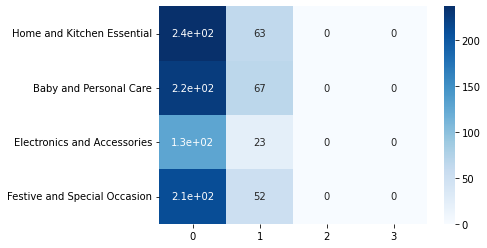

In [36]:
# modifier format annotations
plt.figure(figsize = (6, 4))
sns.heatmap(df_cm, annot = True, cmap = 'Blues')
plt.show()

# Etape 2 : classification supervisée
4 approches sont présentées :
* Une approche simple par préparation initiale de l'ensemble des images avant classification supervisée
* Une approche par data generator, permettant facilement la data augmentation. Les images sont directement récupérées à la volée dans le repertoire des images
* Une approche récente proposée par Tensorflow.org par DataSet, sans data augmentation
* Une approche par  DataSet, avec data augmentation intégrée au modèle : layer en début de modèle


## Création du modèle de classification

In [37]:
# cf fichier fonctions.py

## Approche préparation initiale des images

In [38]:
# Séparer "data" en deux morceaux pour avoir data train et data test
data.shape

(1006, 3)

In [39]:
data

,image_path,label_name,label
0,../../data/Images/aa68675f50a0551b8dadb954017a...,Home and Kitchen Essential,3
1,../../data/Images/037c2402fee39fbc80433935711d...,Baby and Personal Care,0
2,../../data/Images/42643c1c9403f67921a18654bcf4...,Baby and Personal Care,0
3,../../data/Images/53f4bc7d7321f5c41de6b86e41f1...,Home and Kitchen Essential,3
4,../../data/Images/b144a363c107c7bdd91f32d6e28b...,Home and Kitchen Essential,3
...,...,...,...
1001,../../data/Images/4e5ebfc871992e7e22365c0c036a...,Baby and Personal Care,0
1002,../../data/Images/82fbc93cd45ab747e7e606f2c52c...,Baby and Personal Care,0
1003,../../data/Images/216c6c3527984be3d7ad9023d5cd...,Baby and Personal Care,0
1004,../../data/Images/f54d0c5cbd8e2270742293edf907...,Baby and Personal Care,0


In [40]:
data_train = data[:700]
data_train

,image_path,label_name,label
0,../../data/Images/aa68675f50a0551b8dadb954017a...,Home and Kitchen Essential,3
1,../../data/Images/037c2402fee39fbc80433935711d...,Baby and Personal Care,0
2,../../data/Images/42643c1c9403f67921a18654bcf4...,Baby and Personal Care,0
3,../../data/Images/53f4bc7d7321f5c41de6b86e41f1...,Home and Kitchen Essential,3
4,../../data/Images/b144a363c107c7bdd91f32d6e28b...,Home and Kitchen Essential,3
...,...,...,...
695,../../data/Images/534d9c3ae2342df2f4f9233622f9...,Festive and Special Occasion,2
696,../../data/Images/08613e8b27838b997069b1fedb6e...,Electronics and Accessories,1
697,../../data/Images/a63eecfbb02004863fa1f29a0b81...,Electronics and Accessories,1
698,../../data/Images/6ed34e1ab886e8a702ec59dd66ba...,Home and Kitchen Essential,3


In [41]:
data_test = data[700:]
data_test.reset_index(drop = True, inplace = True)

In [42]:
images_np = fonctions.image_prep_fct(data_train)
images_np

array([[[[ 95.061    ,  79.221    ,  68.32     ],
         [ 93.061    ,  76.221    ,  68.32     ],
         [ 95.061    ,  77.221    ,  71.32     ],
         ...,
         [ 71.061    ,  62.221    ,  56.32     ],
         [ 69.061    ,  60.221    ,  54.32     ],
         [ 66.061    ,  57.221    ,  51.32     ]],

        [[ 93.061    ,  77.221    ,  66.32     ],
         [ 93.061    ,  76.221    ,  68.32     ],
         [ 96.061    ,  78.221    ,  72.32     ],
         ...,
         [ 68.061    ,  59.221    ,  53.32     ],
         [ 68.061    ,  59.221    ,  53.32     ],
         [ 69.061    ,  60.221    ,  54.32     ]],

        [[ 94.061    ,  77.221    ,  69.32     ],
         [ 94.061    ,  77.221    ,  69.32     ],
         [ 95.061    ,  77.221    ,  71.32     ],
         ...,
         [ 70.061    ,  61.221    ,  55.32     ],
         [ 67.061    ,  58.221    ,  52.32     ],
         [ 64.061    ,  55.221    ,  49.32     ]],

        ...,

        [[ 84.061    ,  70.221    ,  6

In [43]:
images_np.shape

(700, 224, 224, 3)

In [44]:
images_np_test = fonctions.image_prep_fct(data_test)
images_np_test

array([[[[ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         ...,
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ]],

        [[ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         ...,
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ]],

        [[ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         ...,
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ]],

        ...,

        [[ 151.061   ,  138.22101 ,  1

In [45]:
images_np_test.shape

(306, 224, 224, 3)

In [46]:
X = images_np
X

array([[[[ 95.061    ,  79.221    ,  68.32     ],
         [ 93.061    ,  76.221    ,  68.32     ],
         [ 95.061    ,  77.221    ,  71.32     ],
         ...,
         [ 71.061    ,  62.221    ,  56.32     ],
         [ 69.061    ,  60.221    ,  54.32     ],
         [ 66.061    ,  57.221    ,  51.32     ]],

        [[ 93.061    ,  77.221    ,  66.32     ],
         [ 93.061    ,  76.221    ,  68.32     ],
         [ 96.061    ,  78.221    ,  72.32     ],
         ...,
         [ 68.061    ,  59.221    ,  53.32     ],
         [ 68.061    ,  59.221    ,  53.32     ],
         [ 69.061    ,  60.221    ,  54.32     ]],

        [[ 94.061    ,  77.221    ,  69.32     ],
         [ 94.061    ,  77.221    ,  69.32     ],
         [ 95.061    ,  77.221    ,  71.32     ],
         ...,
         [ 70.061    ,  61.221    ,  55.32     ],
         [ 67.061    ,  58.221    ,  52.32     ],
         [ 64.061    ,  55.221    ,  49.32     ]],

        ...,

        [[ 84.061    ,  70.221    ,  6

In [47]:
y = to_categorical(data['label'][:700])
y

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [48]:
X_test = images_np_test
X_test

array([[[[ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         ...,
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ]],

        [[ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         ...,
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ]],

        [[ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         ...,
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ],
         [ 151.061   ,  138.22101 ,  131.32    ]],

        ...,

        [[ 151.061   ,  138.22101 ,  1

In [49]:
data_test['label'].unique()

array([3, 0, 1, 2])

In [50]:
y_test = to_categorical(data_test['label'])
y_test

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [51]:
y_test.shape

(306, 4)

In [52]:
# Train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 42)
X_train.shape

(525, 224, 224, 3)

In [53]:
X_test.shape

(306, 224, 224, 3)

In [54]:
y_train.shape

(525, 4)

In [55]:
# Création du modèle
with tf.device('/gpu:0'):
    model1 = fonctions.create_model_fct()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [56]:
# Création du callback
model1_save_path1 = './model1_best_weights.h5'
checkpoint = ModelCheckpoint(model1_save_path1, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
callbacks_list = [checkpoint, es]

In [57]:
# Entraîner sur les données d'entraînement (X_train, y_train)
with tf.device('/gpu:0'):
    history1 = model1.fit(X_train, y_train, epochs = 50, batch_size = 64, callbacks = callbacks_list, validation_data = (X_val, y_val), verbose = 1)

Epoch 1/50


2024-03-01 15:38:20.909397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 8.8827 - accuracy: 0.2838

2024-03-01 15:38:31.998520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 4.47545, saving model to ./model1_best_weights.h5
9/9 [==============================] - 15s 2s/step - loss: 8.8827 - accuracy: 0.2838 - val_loss: 4.4754 - val_accuracy: 0.3314
Epoch 2/50
9/9 [==============================] - ETA: 0s - loss: 5.2518 - accuracy: 0.3010
Epoch 2: val_loss improved from 4.47545 to 3.71022, saving model to ./model1_best_weights.h5
9/9 [==============================] - 13s 1s/step - loss: 5.2518 - accuracy: 0.3010 - val_loss: 3.7102 - val_accuracy: 0.3029
Epoch 3/50
9/9 [==============================] - ETA: 0s - loss: 3.5101 - accuracy: 0.3886
Epoch 3: val_loss did not improve from 3.71022
9/9 [==============================] - 13s 1s/step - loss: 3.5101 - accuracy: 0.3886 - val_loss: 3.8684 - val_accuracy: 0.2571
Epoch 4/50
9/9 [==============================] - ETA: 0s - loss: 2.7454 - accuracy: 0.4629
Epoch 4: val_loss improved from 3.71022 to 3.52945, saving model to ./model1_best_weights.h5
9/9 [===============

In [58]:
# Score du dernier epoch
loss, accuracy = model1.evaluate(X_train, y_train, verbose = True)
print('Training Accuracy: {:.4f}'.format(accuracy))

loss, accuracy = model1.evaluate(X_val, y_val, verbose = True)
print('Validation Accuracy: {:.4f}'.format(accuracy))

17/17 [==============================] - 9s 529ms/step - loss: 0.1617 - accuracy: 0.9829
Training Accuracy: 0.9829
6/6 [==============================] - 3s 499ms/step - loss: 2.7844 - accuracy: 0.2343
Validation Accuracy: 0.2343


In [59]:
# Score de l'epoch optimal
model1.load_weights(model1_save_path1)

loss, accuracy = model1.evaluate(X_val, y_val, verbose = False)
print('Validation Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model1.evaluate(X_test, y_test, verbose = False)
print('Test Accuracy : {:.4f}'.format(accuracy))

Validation Accuracy : 0.2514
Test Accuracy : 0.2386


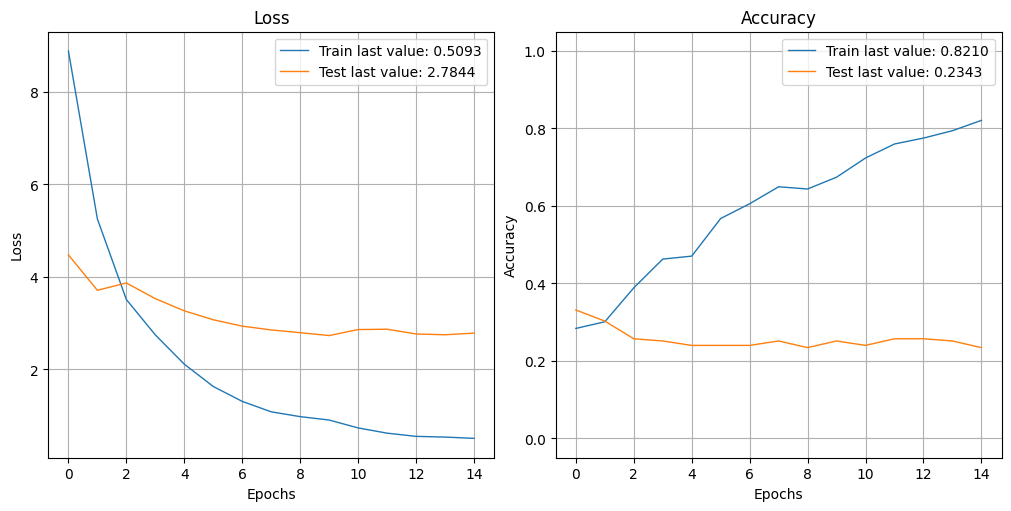

In [60]:
show_history(history1)
plot_history(history1, path = 'standard.png')
plt.close()

In [61]:
y_val_num = np.argmax(y_val, axis = 1)
print(y_val_num)

[0 1 3 0 2 1 0 2 0 2 1 1 0 3 1 1 0 0 2 1 3 1 1 3 2 1 0 0 0 0 0 0 1 1 0 1 1
 1 3 2 1 0 0 1 0 0 1 0 3 3 3 3 1 1 1 1 0 1 2 1 0 3 3 0 3 2 0 1 1 2 3 3 3 1
 3 2 3 0 1 2 0 1 1 3 2 2 3 3 1 3 0 3 0 0 1 3 3 2 2 0 3 0 2 0 3 0 0 1 3 3 0
 1 3 1 2 0 1 3 1 0 3 1 2 3 1 2 1 0 0 1 1 3 0 1 1 2 0 2 1 2 2 2 0 1 0 0 0 1
 1 1 3 0 0 1 2 3 0 0 2 1 1 1 1 3 3 3 0 3 2 3 0 3 2 1 0]


In [62]:
y_val_pred = np.argmax(model1.predict(X_val), axis = 1)
print(y_val_pred)

2024-03-01 15:41:58.369572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0 3 3 0 2 3 0 1 1 1 0 3 1 0 2 1 1 0 0 1 2 3 0 2 0 3 1 0 3 3 0 2 3 1 0 3 3
 2 1 2 0 1 2 0 3 1 1 1 0 3 1 1 1 1 2 3 1 3 1 1 2 1 2 0 1 1 1 0 3 1 3 0 3 0
 1 1 1 2 2 0 0 2 3 0 1 0 0 0 0 2 1 0 3 3 2 2 2 3 1 0 0 3 0 0 3 2 1 0 2 2 1
 1 1 1 1 3 1 0 1 2 0 1 3 1 1 3 3 1 0 1 0 1 0 1 1 0 0 1 0 1 0 3 3 1 1 0 1 1
 3 0 1 3 1 0 1 1 0 1 1 2 2 0 2 0 3 1 2 3 1 0 1 2 2 0 2]


In [63]:
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred)
print(conf_mat)

[[16 18  8  9]
 [14 18  9 14]
 [ 7 14  3  4]
 [12 13  9  7]]


In [64]:
y_val_pred_transform = fonctions.conf_mat_transform(y_val_num, y_val_pred)
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)
print(conf_mat)

Correspondance des clusters :  [0 0 1 1]
[[34 17  0  0]
 [32 23  0  0]
 [21  7  0  0]
 [25 16  0  0]]


In [65]:
print(metrics.classification_report(y_val_num, y_val_pred_transform))

              precision    recall  f1-score   support

           0       0.30      0.67      0.42        51
           1       0.37      0.42      0.39        55
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        41

    accuracy                           0.33       175
   macro avg       0.17      0.27      0.20       175
weighted avg       0.20      0.33      0.24       175



In [66]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels], columns = [i for i in '0123'])
df_cm

,0,1,2,3
Home and Kitchen Essential,34,17,0,0
Baby and Personal Care,32,23,0,0
Electronics and Accessories,21,7,0,0
Festive and Special Occasion,25,16,0,0


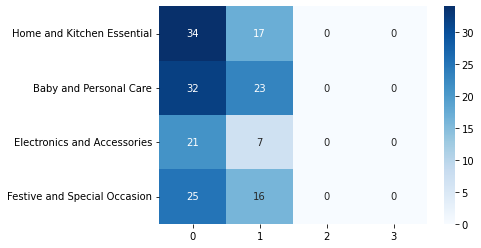

In [67]:
plt.figure(figsize = (6, 4))
sns.heatmap(df_cm, annot = True, cmap = 'Blues')
plt.show()

## Approche ImageDatagenerator avec data augmentation

CF https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow (noté désormais comme "deprecated", incite à utiiser l'approche suivante)

In [68]:
# Pour mélanger les images, classées initalement par classe
data = data.sample(frac = 1, random_state = 42).reset_index(drop = True)

In [69]:
data['label_name'].unique()

array(['Baby and Personal Care', 'Home and Kitchen Essential',
       'Electronics and Accessories', 'Festive and Special Occasion'],
      dtype=object)

In [70]:
data

,image_path,label_name,label
0,../../data/Images/7f6678a6217c831b716feca796f6...,Baby and Personal Care,0
1,../../data/Images/3dfd14b667357e26ff6d66761cdc...,Baby and Personal Care,0
2,../../data/Images/d68b774e9529a4b94a5c6c8943a1...,Home and Kitchen Essential,3
3,../../data/Images/4cc971d2c9c0f1056bc124031ed5...,Electronics and Accessories,1
4,../../data/Images/63f2d92a3f5fc6cfc11e7f99d579...,Baby and Personal Care,0
...,...,...,...
1001,../../data/Images/d7fded8e211b3033e424fb450b97...,Home and Kitchen Essential,3
1002,../../data/Images/cd71b07a1d37a5e2cc04240e8498...,Home and Kitchen Essential,3
1003,../../data/Images/60395c709b4a933319e2713e3ae6...,Baby and Personal Care,0
1004,../../data/Images/b5834f1e97c74d2833dbcb09a3f2...,Baby and Personal Care,0


In [71]:
data = data[data['label_name'].notnull()]

In [72]:
data['label_name'] = data['label_name'].apply(lambda x : x.split(','))

In [73]:
batch_size = 32

In [74]:
data

,image_path,label_name,label
0,../../data/Images/7f6678a6217c831b716feca796f6...,[Baby and Personal Care],0
1,../../data/Images/3dfd14b667357e26ff6d66761cdc...,[Baby and Personal Care],0
2,../../data/Images/d68b774e9529a4b94a5c6c8943a1...,[Home and Kitchen Essential],3
3,../../data/Images/4cc971d2c9c0f1056bc124031ed5...,[Electronics and Accessories],1
4,../../data/Images/63f2d92a3f5fc6cfc11e7f99d579...,[Baby and Personal Care],0
...,...,...,...
1001,../../data/Images/d7fded8e211b3033e424fb450b97...,[Home and Kitchen Essential],3
1002,../../data/Images/cd71b07a1d37a5e2cc04240e8498...,[Home and Kitchen Essential],3
1003,../../data/Images/60395c709b4a933319e2713e3ae6...,[Baby and Personal Care],0
1004,../../data/Images/b5834f1e97c74d2833dbcb09a3f2...,[Baby and Personal Care],0


In [75]:
datagen_train = ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.25,
    preprocessing_function = preprocess_input
    )

train_flow = fonctions.data_flow_fct(batch_size, data, datagen_train, data_type = 'training')
val_flow = fonctions.data_flow_fct(batch_size, data, datagen_train, data_type = 'validation')

datagen_test = ImageDataGenerator(
    validation_split = 0,
    preprocessing_function = preprocess_input)

#test_flow = data_flow_fct(data_test, datagen_test, data_type = None)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:

Found 755 validated image filenames belonging to 4 classes.
Found 251 validated image filenames belonging to 4 classes.


In [76]:
test_flow = fonctions.data_flow_fct(batch_size, data_test, datagen_test, data_type = None)
test_flow

Found 306 validated image filenames belonging to 4 classes.


In [77]:
data_test

,image_path,label_name,label
0,../../data/Images/0e73201f6d8807776e1d21c96907...,Home and Kitchen Essential,3
1,../../data/Images/db6c79a1d852944a89e157793f39...,Home and Kitchen Essential,3
2,../../data/Images/750f964cf8e6a16412aaf2b0d035...,Home and Kitchen Essential,3
3,../../data/Images/a8ea6fc2b3cd95f46bced80853ce...,Baby and Personal Care,0
4,../../data/Images/d376da2235096f74600d842b6f5f...,Baby and Personal Care,0
...,...,...,...
301,../../data/Images/4e5ebfc871992e7e22365c0c036a...,Baby and Personal Care,0
302,../../data/Images/82fbc93cd45ab747e7e606f2c52c...,Baby and Personal Care,0
303,../../data/Images/216c6c3527984be3d7ad9023d5cd...,Baby and Personal Care,0
304,../../data/Images/f54d0c5cbd8e2270742293edf907...,Baby and Personal Care,0


In [78]:
data_test = data_test[data_test['label_name'].notnull()]
data_test['label_name'] = data_test['label_name'].apply(lambda x : x.split(','))

In [79]:
datagen_test = ImageDataGenerator(
    validation_split = 0,
    preprocessing_function = preprocess_input)

test_flow = fonctions.data_flow_fct(batch_size, data_test, datagen_test, data_type = None)

Found 306 validated image filenames belonging to 4 classes.


In [80]:
# Création du modèle
with tf.device('/gpu:0'):
    model2 = fonctions.create_model_fct()

# Création du callback
model2_save_path = './model2_best_weights.h5'
checkpoint = ModelCheckpoint(model2_save_path, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
callbacks_list = [checkpoint, es]

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [81]:
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [82]:
with tf.device('/gpu:0'):
    history2 = model2.fit(
        train_flow,
        validation_data = val_flow,
        batch_size = batch_size,
        epochs = 50,
        callbacks = callbacks_list,
        verbose = 1
        )

Epoch 1/50


2024-03-01 15:42:03.346785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 5.8151 - accuracy: 0.2887

2024-03-01 15:42:22.120210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 3.95310, saving model to ./model2_best_weights.h5
24/24 [==============================] - 26s 1s/step - loss: 5.8151 - accuracy: 0.2887 - val_loss: 3.9531 - val_accuracy: 0.3068
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 3.4476 - accuracy: 0.2874
Epoch 2: val_loss improved from 3.95310 to 2.44897, saving model to ./model2_best_weights.h5
24/24 [==============================] - 24s 1s/step - loss: 3.4476 - accuracy: 0.2874 - val_loss: 2.4490 - val_accuracy: 0.2709
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 2.1728 - accuracy: 0.3815
Epoch 3: val_loss improved from 2.44897 to 2.09634, saving model to ./model2_best_weights.h5
24/24 [==============================] - 25s 1s/step - loss: 2.1728 - accuracy: 0.3815 - val_loss: 2.0963 - val_accuracy: 0.2709
Epoch 4/50
24/24 [==============================] - ETA: 0s - loss: 1.7132 - accuracy: 0.3987
Epoch 4: val_loss improved from 2.09634 to 1.81338, sav

In [83]:
# Score du dernier epoch

loss, accuracy = model2.evaluate(train_flow, verbose = True)
print('Training Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model2.evaluate(val_flow, verbose = True)
print('Validation Accuracy : {:.4f}'.format(accuracy))

24/24 [==============================] - 18s 734ms/step - loss: 0.5620 - accuracy: 0.8344
Training Accuracy : 0.8344
8/8 [==============================] - 6s 725ms/step - loss: 1.9158 - accuracy: 0.2351
Validation Accuracy : 0.2351


In [84]:
# Score de l'epoch optimal
model2.load_weights(model2_save_path)

loss, accuracy = model2.evaluate(val_flow, verbose = False)
print('Validation Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model2.evaluate(test_flow, verbose = False)
print('Test Accuracy : {:.4f}'.format(accuracy))

Validation Accuracy : 0.2510
Test Accuracy : 0.6307


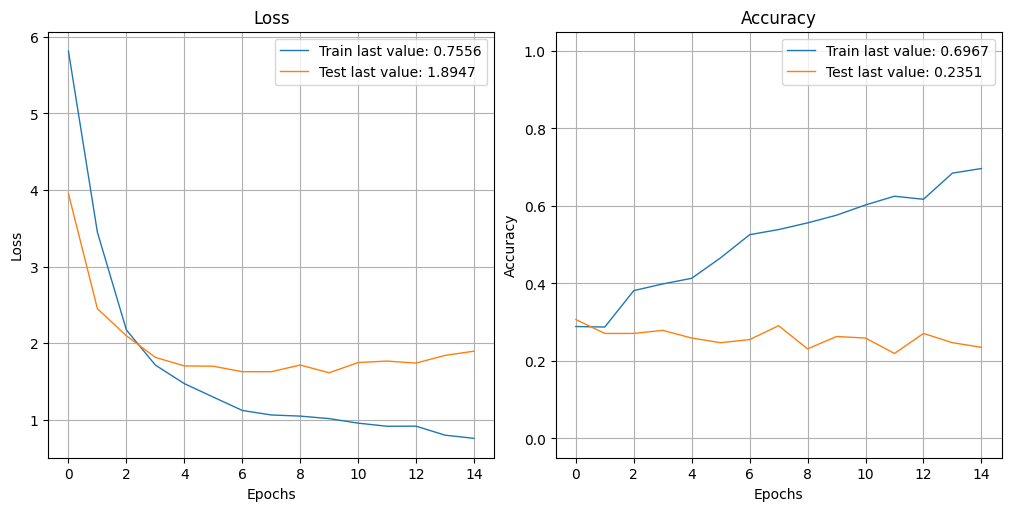

In [85]:
show_history(history2)
plot_history(history2, path = 'standard.png')
plt.close()

## Approche nouvelle par Dataset sans data augmentation

CF https://www.tensorflow.org/tutorials/load_data/images

In [86]:
batch_size = 32

In [108]:
def dataset_fct(batch_size, path, validation_split = 0, data_type = None):
    dataset = tf.keras.utils.image_dataset_from_directory(
                    path, labels = None, label_mode = 'categorical',
                    class_names = None, batch_size = batch_size, image_size = (224, 224), shuffle = True, seed = 42,
                    validation_split = validation_split, subset = data_type
                    )
    return dataset

In [109]:
path = '/Users/lucilerabeau/code/LucileRb/classification_auto_consommation/data/Images/train/'
path_test = '/Users/lucilerabeau/code/LucileRb/classification_auto_consommation/data/Images/test/'

In [112]:
dataset_train = dataset_fct(batch_size, path, validation_split = 0.25, data_type = 'training')
dataset_val = dataset_fct(batch_size, path, validation_split = 0.25, data_type = 'validation')

Found 711 files belonging to 1 classes.
Using 534 files for training.
Found 711 files belonging to 1 classes.
Using 177 files for validation.


In [113]:
dataset_test = dataset_fct(batch_size, path_test, validation_split = 0, data_type = None)

Found 339 files belonging to 1 classes.


In [110]:
dataset_train = fonctions.dataset_fct(batch_size, path, validation_split = 0.25, data_type = 'training')
dataset_val = fonctions.dataset_fct(batch_size, path, validation_split = 0.25, data_type = 'validation')

Found 0 files belonging to 0 classes.
Using 0 files for training.


ValueError: No images found in directory ../../data/Images/train/. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [92]:
dataset_test = fonctions.dataset_fct(batch_size, path_test, validation_split = 0, data_type = None)

Found 0 files belonging to 0 classes.


ValueError: No images found in directory ../../data/Images/test/. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [100]:
path = '/Users/lucilerabeau/code/LucileRb/classification_auto_consommation/data/Images/train/'
dataset_train = fonctions.dataset_fct(batch_size, path, validation_split = 0.25, data_type = 'training')

Found 0 files belonging to 0 classes.
Using 0 files for training.


ValueError: No images found in directory /Users/lucilerabeau/code/LucileRb/classification_auto_consommation/data/Images/train/. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [ ]:
def dataset_fct(batch_size, path, validation_split = 0, data_type = None):
    dataset = tf.keras.utils.image_dataset_from_directory(
                    path, labels = 'inferred', label_mode = 'categorical',
                    class_names = None, batch_size = batch_size, image_size = (224, 224), shuffle = True, seed = 42,
                    validation_split = validation_split, subset = data_type
                    )
    return dataset

In [104]:
tf.keras.utils.image_dataset_from_directory(
                    directory = '/Users/lucilerabeau/code/LucileRb/classification_auto_consommation/data/Images/train/', labels = None, label_mode = 'categorical',
                    class_names = None, batch_size = 32, image_size = (224, 224), shuffle = True, seed = 42,
                    validation_split = 0, subset = None
                    )

Found 711 files belonging to 1 classes.


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [114]:
# Création du modèle
with tf.device('/gpu:0'):
    model3 = fonctions.create_model_fct()

# Création du callback
model3_save_path = './model3_best_weights.h5'
checkpoint = ModelCheckpoint(model3_save_path, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
callbacks_list = [checkpoint, es]

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [115]:
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [116]:
with tf.device('/gpu:0'):
    history3 = model3.fit(
        dataset_train,
        validation_data = dataset_val,
        batch_size = batch_size,
        epochs = 50,
        callbacks = callbacks_list,
        verbose = 1
        )

Epoch 1/50


ValueError: in user code:

    File "/Users/lucilerabeau/.pyenv/versions/3.9.7/envs/artefact/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/lucilerabeau/.pyenv/versions/3.9.7/envs/artefact/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/lucilerabeau/.pyenv/versions/3.9.7/envs/artefact/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/lucilerabeau/.pyenv/versions/3.9.7/envs/artefact/lib/python3.9/site-packages/keras/engine/training.py", line 861, in train_step
        self._validate_target_and_loss(y, loss)
    File "/Users/lucilerabeau/.pyenv/versions/3.9.7/envs/artefact/lib/python3.9/site-packages/keras/engine/training.py", line 818, in _validate_target_and_loss
        raise ValueError(

    ValueError: Target data is missing. Your model was compiled with loss=categorical_crossentropy, and therefore expects target data to be provided in `fit()`.


In [ ]:
# Score du dernier epoch

loss, accuracy = model3.evaluate(dataset_train, verbose = True)
print('Training Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model3.evaluate(dataset_val, verbose = True)
print('Validation Accuracy : {:.4f}'.format(accuracy))

In [ ]:
# Score de l'epoch optimal
model3.load_weights(model3_save_path)

loss, accuracy = model3.evaluate(dataset_val, verbose = False)
print('Validation Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model3.evaluate(dataset_test, verbose = False)
print('Test Accuracy : {:.4f}'.format(accuracy))


In [ ]:
show_history(history3)
plot_history(history3, path = 'standard.png')
plt.close()

## Approche nouvelle par Dataset avec data augmentation intégrée au modèle

CF https://www.tensorflow.org/tutorials/images/data_augmentation

In [ ]:
batch_size = 32

In [ ]:
dataset_train = fonctions.dataset_fct(batch_size, path, validation_split = 0.25, data_type = 'training')
dataset_val = fonctions.dataset_fct(batch_size, path, validation_split = 0.25, data_type = 'validation')
dataset_test = fonctions.dataset_fct(batch_size, path_test, validation_split = 0, data_type = None)

In [ ]:
# Création du modèle
with tf.device('/gpu:0'):
    model4 = fonctions.create_model_fct2()

# Création du callback
model4_save_path = './model4_best_weights.h5'
checkpoint = ModelCheckpoint(model4_save_path, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
callbacks_list = [checkpoint, es]

In [ ]:
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

In [ ]:
with tf.device('/gpu:0'):
    history4 = model4.fit(dataset_train,
                    validation_data = dataset_val,
                    batch_size = batch_size, epochs = 50, callbacks = callbacks_list, verbose = 1)

In [ ]:
# Score du dernier epoch

loss, accuracy = model4.evaluate(dataset_train, verbose = True)
print('Training Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model4.evaluate(dataset_val, verbose = True)
print('Validation Accuracy : {:.4f}'.format(accuracy))

In [ ]:
# Score de l'epoch optimal
model4.load_weights(model4_save_path)

loss, accuracy = model4.evaluate(dataset_val, verbose = False)
print('Validation Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model4.evaluate(dataset_test, verbose = False)
print('Test Accuracy : {:.4f}'.format(accuracy))


In [ ]:
show_history(history4)
plot_history(history4, path = 'standard.png')
plt.close()